<a href="https://colab.research.google.com/github/ishandahal/natural_language_toolkit/blob/main/Processing_raw_text_nltk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk, re, pprint
from nltk import word_tokenize

In [197]:
nltk.download(["punkt", 'stopwords', 'genesis', 'gutenberg', "wordnet", 'unicode_samples', 'words', 'treebank', 'udhr', 'toolbox', 'nps_chat', 'brown', 'webtext'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package unicode_samples to /root/nltk_data...
[nltk_data]   Package unicode_samples is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package udhr to /root/nltk_data...
[nltk_data]

True

### Accessing Text from the Web and from Disk

In [ ]:
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(type(raw))
print(len(raw))
raw[:76]

<class 'str'>
1176967


'\ufeffThe Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r\n'

In [ ]:
tokens = word_tokenize(raw)
print(type(tokens))
print(len(tokens))
tokens[:10]

<class 'list'>
257727


['\ufeffThe',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by']

In [ ]:
text = nltk.Text(tokens)
print(type(text))
print(text[1024:1062])
text.collocations() ## Word pairs that appear together

<class 'nltk.text.Text'>
['an', 'exceptionally', 'hot', 'evening', 'early', 'in', 'July', 'a', 'young', 'man', 'came', 'out', 'of', 'the', 'garret', 'in', 'which', 'he', 'lodged', 'in', 'S.', 'Place', 'and', 'walked', 'slowly', ',', 'as', 'though', 'in', 'hesitation', ',', 'towards', 'K.', 'bridge', '.', 'He', 'had', 'successfully']
Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; young man; Nikodim Fomitch; Ilya Petrovitch; Project
Gutenberg; Andrey Semyonovitch; Hay Market; Dmitri Prokofitch; Good
heavens


### Sometimes there are extra texts that we do not care about. We can remove that.

In [ ]:
print(raw.find("PART I"))
print(raw.rfind("End of Project Gutenberg"))
raw = raw[5336:1157812] # Slicing the content to include just the relevant text
raw.find("PART I")

5336
1157812


0

### Dealing with HTML

In [ ]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = request.urlopen(url).read().decode('utf8')
html[:60]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

Using Beautiful Soup library 

In [ ]:
from bs4 import BeautifulSoup
raw = BeautifulSoup(html, 'html.parser').get_text()
tokens = word_tokenize(raw)
print(tokens)

['BBC', 'NEWS', '|', 'Health', '|', 'Blondes', "'to", 'die', 'out', 'in', '200', "years'", 'NEWS', 'SPORT', 'WEATHER', 'WORLD', 'SERVICE', 'A-Z', 'INDEX', 'SEARCH', 'You', 'are', 'in', ':', 'Health', 'News', 'Front', 'Page', 'Africa', 'Americas', 'Asia-Pacific', 'Europe', 'Middle', 'East', 'South', 'Asia', 'UK', 'Business', 'Entertainment', 'Science/Nature', 'Technology', 'Health', 'Medical', 'notes', '--', '--', '--', '--', '--', '--', '-', 'Talking', 'Point', '--', '--', '--', '--', '--', '--', '-', 'Country', 'Profiles', 'In', 'Depth', '--', '--', '--', '--', '--', '--', '-', 'Programmes', '--', '--', '--', '--', '--', '--', '-', 'SERVICES', 'Daily', 'E-mail', 'News', 'Ticker', 'Mobile/PDAs', '--', '--', '--', '--', '--', '--', '-', 'Text', 'Only', 'Feedback', 'Help', 'EDITIONS', 'Change', 'to', 'UK', 'Friday', ',', '27', 'September', ',', '2002', ',', '11:51', 'GMT', '12:51', 'UK', 'Blondes', "'to", 'die', 'out', 'in', '200', "years'", 'Scientists', 'believe', 'the', 'last', 'blond

Getting the text of interest

In [ ]:
tokens = tokens[110:390]
text = nltk.Text(tokens)
print(text.concordance("gene"))

Displaying 5 of 5 matches:
hey say too few people now carry the gene for blondes to last beyond the next 
blonde hair is caused by a recessive gene . In order for a child to have blond
 have blonde hair , it must have the gene on both sides of the family in the g
ere is a disadvantage of having that gene or by chance . They do n't disappear
des would disappear is if having the gene was a disadvantage and I do not thin
None


Processing RSS Feeds

In [ ]:
pip install feedparser

     |████████████████████████████████| 81kB 4.8MB/s 
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-cp36-none-any.whl size=6067 sha256=7a35b7ebc252c679c38eafe20693057455da1837c425db2ed48831fa2cc033b0
  Stored in directory: /root/.cache/pip/wheels/f1/80/5a/444ba08a550cdd241bd9baf8bae44be750efe370adb944506a
Successfully built sgmllib3k


In [ ]:
import feedparser
llog = feedparser.parse("http://languagelog.ldc.upenn.edu/nll/?feed=atom")
print(llog['feed']['title'])
print(len(llog.entries))
post = llog.entries[3]
post.title
content = post.content[0].value
print(content[:70])
raw = BeautifulSoup(content, 'html.parser').get_text()
print(word_tokenize(raw))

Language Log
13
<blockquote class="twitter-tweet">
<p dir="ltr" lang="en">"We're worki
["''", 'We', "'re", 'working', 'on', 'mass', 'distribution', 'of', 'the', 'virus', '.', "''", '—', 'Treasury', 'Sec', '.', 'Steve', 'Mnuchin', ',', 'who', 'we', 'hope', 'is', 'working', 'on', 'mass', 'distribution', 'of', 'the', '~vaccine~', 'and', 'not', 'the', 'virus', '.', 'pic.twitter.com/DqaTC1ZTmD', '—', 'The', 'Recount', '(', '@', 'therecount', ')', 'November', '20', ',', '2020', 'Your', 'browser', 'does', 'not', 'support', 'the', 'audio', 'element', '.', 'Well', 'we-', 'we-', 'we-', 'we-', 'we', 'hope', 'it', "won't", 'and', 'again', 'you', 'know', 'we', "'re", 'working', 'on', 'mass', 'distribution', 'of', 'the', 'virus', 'uh', 'and', 'again', 'For', 'more', 'on', 'word-substitution', 'errors', 'like', 'Mnuchin', "'s", 'virus', 'for', 'vaccine', ',', 'see', '``', 'Defendants', 'wrongly', 'committed', 'of', 'a', 'crime', "''", ',', '8/4/2011', '.', 'There', 'are', 'a', 'couple', 'of', 'other'

### Reading Local Files

In [ ]:
f = open('SAMPLE.txt')
print(f.read()[:100])

-- phpMyAdmin SQL Dump
-- version 3.3.9
-- http://www.phpmyadmin.net
--
-- Host: localhost
-- Genera


Reading the text file one line at a time 

In [ ]:
f = open('SAMPLE.txt', 'rU')
for line in f:
    print(line.strip())

-- phpMyAdmin SQL Dump
-- version 3.3.9
-- http://www.phpmyadmin.net
--
-- Host: localhost
-- Generation Time: Feb 08, 2014 at 06:53 AM
-- Server version: 5.1.36
-- PHP Version: 5.3.0

SET SQL_MODE="NO_AUTO_VALUE_ON_ZERO";

--
-- Database: `sample`
--

-- --------------------------------------------------------

--
-- Table structure for table `agents`
--

CREATE TABLE IF NOT EXISTS `agents` (
`AGENT_CODE` varchar(6) NOT NULL DEFAULT '',
`AGENT_NAME` varchar(40) DEFAULT NULL,
`WORKING_AREA` varchar(35) DEFAULT NULL,
`COMMISSION` decimal(10,2) DEFAULT NULL,
`PHONE_NO` varchar(15) DEFAULT NULL,
`COUNTRY` varchar(25) DEFAULT NULL,
PRIMARY KEY (`AGENT_CODE`)
) ENGINE=MyISAM DEFAULT CHARSET=latin1;

--
-- Dumping data for table `agents`
--

INSERT INTO `agents` (`AGENT_CODE`, `AGENT_NAME`, `WORKING_AREA`, `COMMISSION`, `PHONE_NO`, `COUNTRY`) VALUES
('A007  ', 'Ramasundar                              ', 'Bangalore                          ', '0.15', '077-25814763   ', '\r'),
('A003  ', 'Alex

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [ ]:
path = nltk.data.find('corpora/gutenberg/melville-moby_dick.txt')
raw = open(path, 'rU').read()
raw[:100]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


'[Moby Dick by Herman Melville 1851]\n\n\nETYMOLOGY.\n\n(Supplied by a Late Consumptive Usher to a Grammar'

Capturing input

In [ ]:
s = input("Enter some text: ")

Enter some text: one more time of this


In [ ]:
print("You typed", len(word_tokenize(s)), "words.")

You typed 5 words.


In [ ]:
### Working with text
from nltk.corpus import gutenberg
raw = gutenberg.raw('melville-moby_dick.txt')
fdist = nltk.FreqDist(ch.lower() for ch in raw if ch.isalpha())
print(fdist.most_common(5))
print([char for (char, count) in fdist.most_common()])

[('e', 117092), ('t', 87996), ('a', 77916), ('o', 69326), ('n', 65617)]
['e', 't', 'a', 'o', 'n', 'i', 's', 'h', 'r', 'l', 'd', 'u', 'm', 'c', 'w', 'f', 'g', 'p', 'b', 'y', 'v', 'k', 'q', 'j', 'x', 'z']


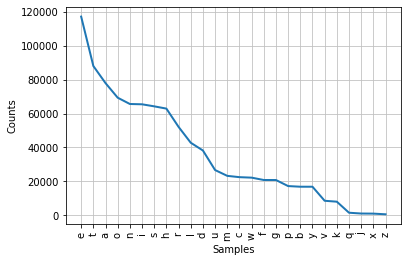

In [ ]:
fdist.plot()

### Text processing with Unicode
- Extracting encoded text from files

In [ ]:
path = nltk.data.find('corpora/unicode_samples/polish-lat2.txt')

In [ ]:
f = open(path, encoding='latin2')
for line in f:
    line = line.strip()
    print(line)

Pruska Biblioteka Państwowa. Jej dawne zbiory znane pod nazwą
"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez
Niemców pod koniec II wojny światowej na Dolny Śląsk, zostały
odnalezione po 1945 r. na terytorium Polski. Trafiły do Biblioteki
Jagiellońskiej w Krakowie, obejmują ponad 500 tys. zabytkowych
archiwaliów, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.


In [ ]:
f = open(path, encoding='latin2')
for line in f:
    line = line.strip()
    print(line.encode('unicode_escape'))

b'Pruska Biblioteka Pa\\u0144stwowa. Jej dawne zbiory znane pod nazw\\u0105'
b'"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez'
b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y'
b'odnalezione po 1945 r. na terytorium Polski. Trafi\\u0142y do Biblioteki'
b'Jagiello\\u0144skiej w Krakowie, obejmuj\\u0105 ponad 500 tys. zabytkowych'
b'archiwali\\xf3w, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.'


In [ ]:
print(ord('ń'))
print(hex(324))

324
0x144


In [ ]:
nacute = '\u0144'
nacute

'ń'

In [ ]:
nacute.encode('utf8')

b'\xc5\x84'

In [ ]:
import unicodedata
lines = open(path, encoding='latin2').readlines()
line = lines[2]
print(line.encode('unicode_escape'))
for c in line:
    if ord(c) > 127:
        print(f"{c.encode('utf8')} U+{ord(c):04x} {unicodedata.name(c)}")

b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y\\n'
b'\xc3\xb3' U+00f3 LATIN SMALL LETTER O WITH ACUTE
b'\xc5\x9b' U+015b LATIN SMALL LETTER S WITH ACUTE
b'\xc5\x9a' U+015a LATIN CAPITAL LETTER S WITH ACUTE
b'\xc4\x85' U+0105 LATIN SMALL LETTER A WITH OGONEK
b'\xc5\x82' U+0142 LATIN SMALL LETTER L WITH STROKE


In [ ]:
print(line.find('zosta\u0142y'))
line = line.lower()
print(line)
line.encode('unicode_escape')

54
niemców pod koniec ii wojny światowej na dolny śląsk, zostały



b'niemc\\xf3w pod koniec ii wojny \\u015bwiatowej na dolny \\u015bl\\u0105sk, zosta\\u0142y\\n'

In [ ]:
import re
m = re.search('\u015b\w*', line)
m.group()

'światowej'

In [ ]:
print(word_tokenize(line))

['niemców', 'pod', 'koniec', 'ii', 'wojny', 'światowej', 'na', 'dolny', 'śląsk', ',', 'zostały']


### Using Regular Expression for Detecting Word Patterns

In [ ]:
import re
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

Using basic meta-characters

In [ ]:
print([w for w in wordlist if re.search('ed$', w)])
print([w for w in wordlist if re.search('^..j..t..$', w)])
print([w for w in wordlist if re.search('..j..t..', w)])
print(sum((1 for w in wordlist if re.search('^e-?mail$', w))))

['abaissed', 'abandoned', 'abased', 'abashed', 'abatised', 'abed', 'aborted', 'abridged', 'abscessed', 'absconded', 'absorbed', 'abstracted', 'abstricted', 'accelerated', 'accepted', 'accidented', 'accoladed', 'accolated', 'accomplished', 'accosted', 'accredited', 'accursed', 'accused', 'accustomed', 'acetated', 'acheweed', 'aciculated', 'aciliated', 'acknowledged', 'acorned', 'acquainted', 'acquired', 'acquisited', 'acred', 'aculeated', 'addebted', 'added', 'addicted', 'addlebrained', 'addleheaded', 'addlepated', 'addorsed', 'adempted', 'adfected', 'adjoined', 'admired', 'admitted', 'adnexed', 'adopted', 'adossed', 'adreamed', 'adscripted', 'aduncated', 'advanced', 'advised', 'aeried', 'aethered', 'afeared', 'affected', 'affectioned', 'affined', 'afflicted', 'affricated', 'affrighted', 'affronted', 'aforenamed', 'afterfeed', 'aftershafted', 'afterthoughted', 'afterwitted', 'agazed', 'aged', 'agglomerated', 'aggrieved', 'agminated', 'agnamed', 'agonied', 'agreed', 'agueweed', 'ahungere

Ranges and Closures

In [ ]:
print([w for w in wordlist if re.search('^[ghi][mno][jkl][def]$', w)])
print([w for w in wordlist if re.search('^[g-o]+$', w)])
print([w for w in wordlist if re.search('^[a-fj-o]+$', w)])

['gold', 'golf', 'hold', 'hole']
['g', 'ghoom', 'gig', 'giggling', 'gigolo', 'gilim', 'gill', 'gilling', 'gilo', 'gim', 'gin', 'ging', 'gingili', 'gink', 'ginkgo', 'ginning', 'gio', 'glink', 'glom', 'glonoin', 'gloom', 'glooming', 'gnomon', 'go', 'gog', 'gogo', 'goi', 'going', 'gol', 'goli', 'gon', 'gong', 'gonion', 'goo', 'googol', 'gook', 'gool', 'goon', 'h', 'hi', 'high', 'hill', 'him', 'hin', 'hing', 'hinoki', 'ho', 'hog', 'hoggin', 'hogling', 'hoi', 'hoin', 'holing', 'holl', 'hollin', 'hollo', 'hollong', 'holm', 'homo', 'homologon', 'hong', 'honk', 'hook', 'hoon', 'i', 'igloo', 'ihi', 'ilk', 'ill', 'imi', 'imino', 'immi', 'in', 'ing', 'ingoing', 'inion', 'ink', 'inkling', 'inlook', 'inn', 'inning', 'io', 'ion', 'j', 'jhool', 'jig', 'jing', 'jingling', 'jingo', 'jinjili', 'jink', 'jinn', 'jinni', 'jo', 'jog', 'johnin', 'join', 'joining', 'joll', 'joom', 'k', 'kiki', 'kil', 'kilhig', 'kilim', 'kill', 'killing', 'kiln', 'kilo', 'kim', 'kimono', 'kin', 'king', 'kingling', 'kink', 'kin

In [ ]:
wsj = sorted(set(nltk.corpus.treebank.words()))
print([w for w in wsj if re.search('(ed|ing)$', w)])
print([w for w in wsj if re.search('ed|ing$', w)])

['62%-owned', 'Absorbed', 'According', 'Adopting', 'Advanced', 'Advancing', 'Alfred', 'Allied', 'Annualized', 'Anything', 'Arbitrage-related', 'Arbitraging', 'Asked', 'Assuming', 'Atlanta-based', 'Baking', 'Banking', 'Beginning', 'Beijing', 'Being', 'Bermuda-based', 'Betting', 'Boeing', 'Broadcasting', 'Bucking', 'Buying', 'Calif.-based', 'Change-ringing', 'Citing', 'Concerned', 'Confronted', 'Conn.based', 'Consolidated', 'Continued', 'Continuing', 'Declining', 'Defending', 'Depending', 'Designated', 'Determining', 'Developed', 'Died', 'During', 'Encouraged', 'Encouraging', 'English-speaking', 'Estimated', 'Everything', 'Excluding', 'Exxon-owned', 'Faulding', 'Fed', 'Feeding', 'Filling', 'Filmed', 'Financing', 'Following', 'Founded', 'Fracturing', 'Francisco-based', 'Fred', 'Funded', 'Funding', 'Generalized', 'Germany-based', 'Getting', 'Guaranteed', 'Having', 'Heating', 'Heightened', 'Holding', 'Housing', 'Illuminating', 'Indeed', 'Indexing', 'Irving', 'Jersey-based', 'Judging', 'Know

### Useful Applications of Regular Expressions

Extracting Word Pieces

In [ ]:
word = 'supercalifragilisticexpialidocious'
print(re.findall(r"[aeiou]", word))
print(len(re.findall(r"[aeiou]", word)))

['u', 'e', 'a', 'i', 'a', 'i', 'i', 'i', 'e', 'i', 'a', 'i', 'o', 'i', 'o', 'u']
16


In [ ]:
wsj = sorted(set(nltk.corpus.treebank.words()))
fd = nltk.FreqDist(vs for word in wsj
                      for vs in re.findall(r"[aeiou]{2,}", word))
print(fd.most_common(12))

[('io', 549), ('ea', 476), ('ie', 331), ('ou', 329), ('ai', 261), ('ia', 253), ('ee', 217), ('oo', 174), ('ua', 109), ('au', 106), ('ue', 105), ('ui', 95)]


In [ ]:
[int(n) for n in re.findall(r"[0-9]{2,4}", '2009-12-31')]

[2009, 12, 31]

Doing More with Word Pieces

In [ ]:
regexp = r'^[AEIOUaeiou]+|[AEIOUaeiou]+$|[^AEIOUaeiou]'
def compress(word):
    pieces = re.findall(regexp, word)
    return "".join(pieces)

english_udhr = nltk.corpus.udhr.words('English-Latin1')
print(nltk.tokenwrap(compress(w) for w in english_udhr[:75]))

Unvrsl Dclrtn of Hmn Rghts Prmble Whrs rcgntn of the inhrnt dgnty and
of the eql and inlnble rghts of all mmbrs of the hmn fmly is the fndtn
of frdm , jstce and pce in the wrld , Whrs dsrgrd and cntmpt fr hmn
rghts hve rsltd in brbrs acts whch hve outrgd the cnscnce of mnknd ,
and the advnt of a wrld in whch hmn bngs shll enjy frdm of spch and


In [ ]:
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')
cvs = [cv for w in rotokas_words for cv in re.findall(r'[ptksvr][aeiou]', w)]
cfd = nltk.ConditionalFreqDist(cvs)
cfd.tabulate()

    a   e   i   o   u 
k 418 148  94 420 173 
p  83  31 105  34  51 
r 187  63  84  89  79 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 


In [ ]:
cv_word_pairs = [(cv, w) for w in rotokas_words 
                 for cv in re.findall(r"[ptksvr][aeiou]", w)]
cv_index = nltk.Index(cv_word_pairs)
print(cv_index['su'])
print(cv_index['po'])

['kasuari']
['kaapo', 'kaapopato', 'kaipori', 'kaiporipie', 'kaiporivira', 'kapo', 'kapoa', 'kapokao', 'kapokapo', 'kapokapo', 'kapokapoa', 'kapokapoa', 'kapokapora', 'kapokapora', 'kapokaporo', 'kapokaporo', 'kapokari', 'kapokarito', 'kapokoa', 'kapoo', 'kapooto', 'kapoovira', 'kapopaa', 'kaporo', 'kaporo', 'kaporopa', 'kaporoto', 'kapoto', 'karokaropo', 'karopo', 'kepo', 'kepoi', 'keposi', 'kepoto']


- Finding Word Stems

In [ ]:
def stem(word):
    "Strips off anything that looks like a suffix"

    for suffix in ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']:
        if word.endswith(suffix):
            return word[:-(len(suffix))]
    return word

stem('playing')

'play'

In [ ]:
print(re.findall(r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')) #parenthesis to extract substring
print(re.findall(r'^.*(?:ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')) # parenthesis to specify the scope
print(re.findall(r'(^.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')) # splitting stem and suffix

['ing']
['processing']
[('process', 'ing')]


In [ ]:
print(re.findall(r'(^.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')) # greedy approach
print(re.findall(r'(^.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')) # non-greedy approach

[('processe', 's')]
[('process', 'es')]


In [ ]:
print(re.findall(r'(^.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$', 'language')) #empty suffix

[('language', '')]


In [ ]:
def stem(word):
    regexp = r"(^.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$"
    stem, suffix = re.findall(regexp, word)[0]
    return stem
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)
print([stem(t) for t in tokens])

['DENNIS', ':', 'Listen', ',', 'strange', 'women', 'ly', 'in', 'pond', 'distribut', 'sword', 'i', 'no', 'basi', 'for', 'a', 'system', 'of', 'govern', '.', 'Supreme', 'execut', 'power', 'deriv', 'from', 'a', 'mandate', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


Searching Tokenized Text

In [ ]:
from nltk.corpus import gutenberg, nps_chat
moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))
moby.findall(r"<a> (<.*>) <man>")

monied; nervous; dangerous; white; white; white; pious; queer; good;
mature; white; Cape; great; wise; wise; butterless; white; fiendish;
pale; furious; better; certain; complete; dismasted; younger; brave;
brave; brave; brave


In [ ]:
chat = nltk.Text(nps_chat.words())
chat.findall(r"<.*> <.*> <bro>")

you rule bro; telling you bro; u twizted bro


In [ ]:
chat.findall(r"<l.*>{3,}")

lol lol lol; lmao lol lol; lol lol lol; la la la la la; la la la; la
la la; lovely lol lol love; lol lol lol.; la la la; la la la


In [ ]:
nltk.re_show(r"[abcdn]{3}|[0-9]{2,}", 'My name is blah blah and I was born in 1984')
nltk.re_show(r"M[a-z]+", 'My name is blah blah Myth and I was born in 1984')

My name is blah blah {and} I was born in {1984}
{My} name is blah blah {Myth} and I was born in 1984


In [ ]:
from nltk.corpus import brown
hobbies_learned = nltk.Text(brown.words(categories=['hobbies', 'learned']))
hobbies_learned.findall(r"<\w*> <and> <other> <\w*s>")

speed and other activities; water and other liquids; tomb and other
landmarks; Statues and other monuments; pearls and other jewels;
charts and other items; roads and other features; figures and other
objects; military and other areas; demands and other factors;
abstracts and other compilations; iron and other metals


In [ ]:
hobbies_learned.findall(r"<\w+> <as> <\w+>")

But as you; looks as though; seems as though; split as for; soon as
they; soon as an; just as they; graded as to; determine as accurately;
day as a; long as the; such as the; targets as well; such as economy;
such as these; such as the; regarded as symphonic; music as an;
sounded as sparkling; playing as it; distinction as a; approach as
distinctly; reading as a; and as a; me as finicky; vein as that;
disillusioning as the; such as the; engineering as such; intrudes as
a; reproduce as faithfully; sounds as though; from as far; west as
Wisconsin; and as far; south as Kentucky; introduced as the; do as
much; Juniors as the; chosen as International; Classes as well;
Contest as he; just as successful; Class as it; looking as neat;
Developed as a; clouds as they; question as to; it as simple; way as
an; same as for; way as boats; roads as existed; such as sailboats;
just as much; facilities as a; well as other; premises as well; such
as outboards; tappets as the; locks as you; edge as we; f

#### Normalizing text

In [ ]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
 is no basis for a system of government.  Supreme executive power derives from
 a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)

Stemmers

In [ ]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
print([porter.stem(t) for t in tokens])
print([lancaster.stem(t) for t in tokens])

['denni', ':', 'listen', ',', 'strang', 'women', 'lie', 'in', 'pond', 'distribut', 'sword', 'is', 'no', 'basi', 'for', 'a', 'system', 'of', 'govern', '.', 'suprem', 'execut', 'power', 'deriv', 'from', 'a', 'mandat', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcic', 'aquat', 'ceremoni', '.']
['den', ':', 'list', ',', 'strange', 'wom', 'lying', 'in', 'pond', 'distribut', 'sword', 'is', 'no', 'bas', 'for', 'a', 'system', 'of', 'govern', '.', 'suprem', 'execut', 'pow', 'der', 'from', 'a', 'mand', 'from', 'the', 'mass', ',', 'not', 'from', 'som', 'farc', 'aqu', 'ceremony', '.']


In [ ]:
class IndexedText(object):

    def __init__(self, stemmer, text):
        self._text = text
        self._stemmer = stemmer
        self._index = nltk.Index((self._stem(word), i)
                                 for (i, word) in enumerate(text))
        
    def concordance(self, word, width=40):
        key = self._stem(word)
        wc = int(width / 4)         # words of context
        for i in self._index[key]:
            lcontext = " ".join(self._text[i-wc:i])
            rcontext = " ".join(self._text[i:i+wc])
            ldisplay = "{:>{width}}".format(lcontext[-width:], width=width)
            rdisplay = "{:{width}}".format(rcontext[:width], width=width)
            print(ldisplay, rdisplay)
    
    def _stem(self, word):
        return self._stemmer.stem(word).lower()


In [137]:
porter = nltk.PorterStemmer()
grail = nltk.corpus.webtext.words('grail.txt')
text = IndexedText(porter, grail)
text.concordance('lie')

r king ! DENNIS : Listen , strange women lying in ponds distributing swords is no
 beat a very brave retreat . ROBIN : All lies ! MINSTREL : [ singing ] Bravest of
       Nay . Nay . Come . Come . You may lie here . Oh , but you are wounded !   
doctors immediately ! No , no , please ! Lie down . [ clap clap ] PIGLET : Well  
ere is much danger , for beyond the cave lies the Gorge of Eternal Peril , which 
   you . Oh ... TIM : To the north there lies a cave -- the cave of Caerbannog --
h it and lived ! Bones of full fifty men lie strewn about its lair . So , brave k
not stop our fight ' til each one of you lies dead , and the Holy Grail returns t


Lemmatization

In [142]:
wnl = nltk.WordNetLemmatizer()
print([wnl.lemmatize(t) for t in tokens])

['DENNIS', ':', 'Listen', ',', 'strange', 'woman', 'lying', 'in', 'pond', 'distributing', 'sword', 'is', 'no', 'basis', 'for', 'a', 'system', 'of', 'government', '.', 'Supreme', 'executive', 'power', 'derives', 'from', 'a', 'mandate', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


#### Regular Expressions for Tokenizing Text

Simple Approaches to Tokenization

In [143]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone
... though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
... well without--Maybe it's always pepper that makes people hot-tempered,'..."""

In [148]:
print(re.split(r" ", raw))
print(re.split(r"[ \t\n]+", raw))
print(re.split(r"\s+", raw)) # splits on all white spaces

["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone\nthough),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very\nwell', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]
["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', 'well', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]
["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', 'well', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]


In [151]:
print(re.split(r"\W+", raw)) # \W is anything other than A-Za-z0-9_

['', 'When', 'I', 'M', 'a', 'Duchess', 'she', 'said', 'to', 'herself', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', 'I', 'won', 't', 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', 'Soup', 'does', 'very', 'well', 'without', 'Maybe', 'it', 's', 'always', 'pepper', 'that', 'makes', 'people', 'hot', 'tempered', '']


In [154]:
print(re.findall(r"\w+|\S\w*", raw))

["'When", 'I', "'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'I", 'won', "'t", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '-', '-Maybe', 'it', "'s", 'always', 'pepper', 'that', 'makes', 'people', 'hot', '-tempered', ',', "'", '.', '.', '.']


In [156]:
print(re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw))

["'", 'When', "I'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'", 'I', "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '--', 'Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', 'hot-tempered', ',', "'", '...']


#### Segmentation

Sentence Segmentation

In [157]:
len(nltk.corpus.brown.words()) / len(nltk.corpus.brown.sents())

20.250994070456922

In [159]:
text = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
sents = nltk.sent_tokenize(text)
pprint.pprint(sents[79:89])

['"Nonsense!"',
 'said Gregory, who was very rational when anyone else\nattempted paradox.',
 '"Why do all the clerks and navvies in the\n'
 'railway trains look so sad and tired, so very sad and tired?',
 'I will\ntell you.',
 'It is because they know that the train is going right.',
 'It\n'
 'is because they know that whatever place they have taken a ticket\n'
 'for that place they will reach.',
 'It is because after they have\n'
 'passed Sloane Square they know that the next station must be\n'
 'Victoria, and nothing but Victoria.',
 'Oh, their wild rapture!',
 'oh,\n'
 'their eyes like stars and their souls again in Eden, if the next\n'
 'station were unaccountably Baker Street!"',
 '"It is you who are unpoetical," replied the poet Syme.']


Word Segmentation

In [160]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"

In [161]:
def segment(text, segs):
    words = []
    last = 0
    for i in range(len(segs)):
        if segs[i] == '1':
            words.append(text[last:i+1])
            last = i + 1
    words.append(text[last:])
    return words

In [163]:
print(segment(text, seg1))
print(segment(text, seg2))

['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
['do', 'you', 'see', 'the', 'kitty', 'see', 'the', 'doggy', 'do', 'you', 'like', 'the', 'kitty', 'like', 'the', 'doggy']


In [164]:
def evaluate(text, segs):
    words = segment(text, segs)
    text_size = len(words)
    lexicon_size = sum(len(word) + 1 for word in set(words))
    return text_size + lexicon_size

In [165]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"
seg3 = "0000100100000011001000000110000100010000001100010000001"

In [168]:
print(segment(text, seg3))
print(evaluate(text, seg3))
print(evaluate(text, seg2))
print(evaluate(text, seg1))

['doyou', 'see', 'thekitt', 'y', 'see', 'thedogg', 'y', 'doyou', 'like', 'thekitt', 'y', 'like', 'thedogg', 'y']
47
48
64


In [173]:
from random import randint

def flip(segs, pos):
    return segs[:pos] + str(1 - int(segs[pos])) + segs[pos + 1:]

def flip_n(segs, n):
    for i in range(n):
        segs = flip(segs, randint(0, len(segs) - 1))
    return segs

def anneal(text, segs, iterations, cooling_rate):
    temperature = float(len(segs))
    while temperature > 0.5:
        best_segs, best = segs, evaluate(text, segs)
        for i in range(iterations):
            guess = flip_n(segs, round(temperature))
            score = evaluate(text, guess)
            if score < best:
                best, best_segs = score, guess
        score, segs = best, best_segs
        temperature = temperature / cooling_rate
        print(evaluate(text, segs), segment(text, segs))
    print()
    return segs

In [174]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
anneal(text, seg1, 5000, 1.2)

64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
62 ['d', 'oyouse', 'ethekitty', 's', 'eet', 'hedoggy', 'doyoul', 'ik', 'ethekitty', 'l', 'iket', 'hedoggy']
62 ['d', 'oyouse', 'ethekitty', 's', 'eet', 'hedoggy', 'doyoul', 'ik', 'ethekitty', 'l', 'iket', 'hedoggy']
61 ['doyouse', 'ethekitty', 's', 'e', 'et', 'hedoggy', 'd', 'oyoul', 'ik', 'ethekitty', 'lik', 'et', 'hedoggy']
61 ['doyouse', 'ethekitty', 's', 'e', 'et', 'hedoggy', 'd', 'oyoul', 'ik', 'ethekitty', 'lik', 'et', 'hedoggy']
61 ['doyouse', 'ethekitty', 's', 'e', 'et', 'hedoggy', 'd', 'oyoul', 'ik', 'ethekitty', 'lik', 'et', 'hedoggy']
61 ['doyouse', 'ethekitty', 's', 'e', 'et', 'hedoggy', 'd', 'oyoul',

'0000101000000001010000000010000100100000000100100000000'

#### Formatting: From Lists to Strings

From Lists to Strings

In [175]:
silly = ['We', 'called', 'him', 'Tortoise', 'because', 'he', 'taught', 'us', '.']
print(" ".join(silly))
print(";".join(silly))
print(''.join(silly))

We called him Tortoise because he taught us .
We;called;him;Tortoise;because;he;taught;us;.
WecalledhimTortoisebecausehetaughtus.


Strings and Formats

In [179]:
word = 'cat'
sentence = """hello
world"""
print(word)
print(sentence)
word
sentence

cat
hello
world


'hello\nworld'

In [180]:
fdist = nltk.FreqDist(['dog', 'cat', 'dog', 'cat', 'dog', 'snake', 'dog', 'cat'])
for word in sorted(fdist):
    print(word, '->', fdist[word], end='; ')

cat -> 3; dog -> 4; snake -> 1; 

In [183]:
for word in sorted(fdist):
    print(f"{word}->{fdist[word]}", end='; ')

cat->3; dog->4; snake->1; 

In [193]:
f"{90/100:.2%}"

'90.00%'

In [194]:
def tabulate(cfdist, words, categories):
    print(f"{'Category':16}", end=' ')                            #column heading
    for word in words:                                           
        print(f"{word:>6}", end=' ')
    print()
    for category in categories:
        print(f'{category:16}', end=' ')                            # row heading
        for word in words:                                          # for each word
            print(f"{cfdist[category][word]:6}", end=' ')           # print table cell
        print()                                                     # end the row

In [195]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
            (genre, word)
            for genre in brown.categories()
            for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
tabulate(cfd, modals, genres)

Category            can  could    may  might   must   will 
news                 93     86     66     38     50    389 
religion             82     59     78     12     54     71 
hobbies             268     58    131     22     83    264 
science_fiction      16     49      4     12      8     16 
romance              74    193     11     51     45     43 
humor                16     30      8      8      9     13 


Writing Results to a File

In [200]:
output_file = open('output.txt', 'w')
words = set(nltk.corpus.genesis.words('english-kjv.txt'))
for word in sorted(words):
    print(word, file=output_file)
print(str(len(words)), file=output_file)

Text Wrapping

In [213]:
saying = ['After', 'all', 'is', 'said', 'and', 'done', ',',
              'more', 'is', 'said', 'than', 'done', '.']
for word in saying:
    print(word, '(' + str(len(word)) + '),', end=' ')

After (5), all (3), is (2), said (4), and (3), done (4), , (1), more (4), is (2), said (4), than (4), done (4), . (1), 

In [217]:
from textwrap import fill
pieces = [f"{word} ({len(word)})," for word in saying]
output = ' '.join(pieces)
wrapped = fill(output)
print(wrapped)

After (5), all (3), is (2), said (4), and (3), done (4), , (1), more
(4), is (2), said (4), than (4), done (4), . (1),
